Задача регрессии, архитектуру выбирайте самостоятельно из уже примененных. Подсчет количества людей в толпе на снимке, датасет - https://www.kaggle.com/datasets/fmena14/crowd-counting

Задачи:
* обучить нейросеть и проверить её работу на тестовых данных
* включить в неё кастомный callback, который должен будет в конце каждой итерации сравнивать значения функции потерь на этой эпохе с её значениями на предыдущей и выводить на экран, во сколько раз изменилось это значение (начиная со второй эпохи)
* построить гистограмму для валидационной выборки (по X - количество людей, по Y - количество картинок с таким количеством)
* с помощью коллбэка выводить в конце каждой эпохи гистограммы, где по оси X - предсказанные нейросетью значения количества людей на картинке.

# Libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/fmena14/crowd-counting")

Skipping, found downloaded files in "./crowd-counting" (use force=True to force download)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageFile
from IPython.display import display
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential

# Dataset

In [ ]:
images = np.load('./crowd-counting/images.npy')
print(images.shape)
labels = np.load('./crowd-counting/labels.npy')
print(labels)

(2000, 480, 640, 3)
[[35]
 [41]
 [41]
 ...
 [25]
 [26]
 [26]]


Количество людей: [39]


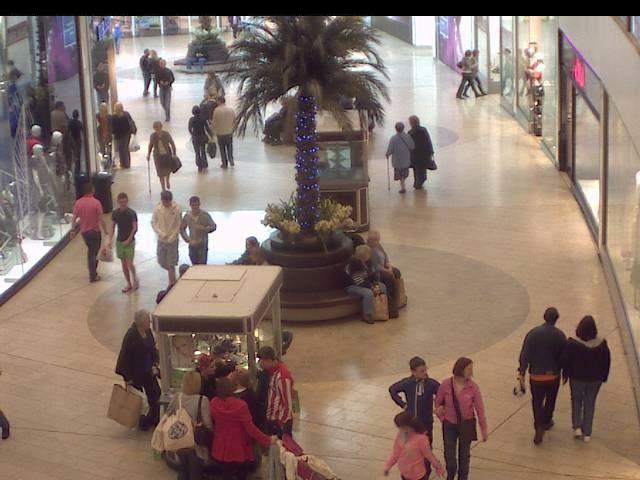

In [ ]:
im = Image.fromarray(images[1000])
print(f'Количество людей: {labels[1000]}')
display(im)

In [ ]:
df1 = pd.read_csv('./crowd-counting/labels.csv', delimiter=',')
df1.dataframeName = 'labels.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2000 rows and 2 columns


In [ ]:
df1.head(5)

,id,count
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if epoch > 0:
        diff = self.prev_loss / logs['loss']
        val_diff = self.prev_val_loss / logs['val_loss']
        print(f' - Difference: {diff:.2f} - Val Difference: {val_diff:.2f}')

        y_pred = model.predict(X_val)

        plt.figure(figsize=(5, 4))
        plt.hist(y_val, alpha=0.5, label='True', color='green')
        plt.hist(y_pred, alpha=0.5, label='Pred', color='purple')
        plt.yticks(range(0, 90, 10))
        plt.xticks(range(10, 60, 10))
        plt.xlabel('Number of people')
        plt.ylabel('Number of images')
        plt.legend()
        plt.show()
        self.diffs.append((epoch, diff))
        self.val_diffs.append((epoch, val_diff))

    else:
      self.diffs = []
      self.val_diffs = []
    self.prev_loss = logs['loss']
    self.prev_val_loss = logs['val_loss']

callback = myCallback()

Epoch 1/20
42/42 [==============================] - 67s 2s/step - loss: 1258.6703 - mean_absolute_error: 20.6382 - val_loss: 108.1971 - val_mean_absolute_error: 8.4233
Epoch 2/20
11/11 [==============================] - 4s 309ms/step


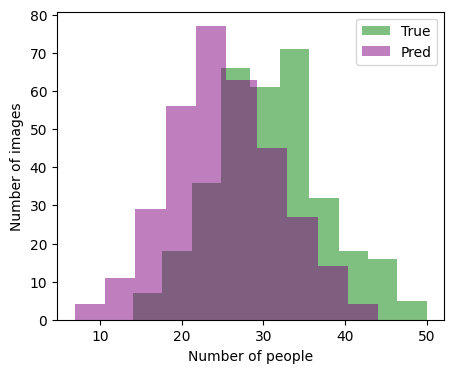

42/42 [==============================] - 66s 2s/step - loss: 62.4472 - mean_absolute_error: 6.2383 - val_loss: 70.5200 - val_mean_absolute_error: 6.7403
Epoch 3/20
11/11 [==============================] - 4s 320ms/step


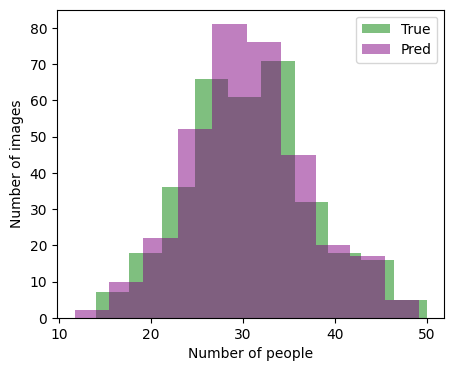

42/42 [==============================] - 65s 2s/step - loss: 37.2277 - mean_absolute_error: 4.8346 - val_loss: 36.3597 - val_mean_absolute_error: 4.6819
Epoch 4/20
11/11 [==============================] - 4s 387ms/step


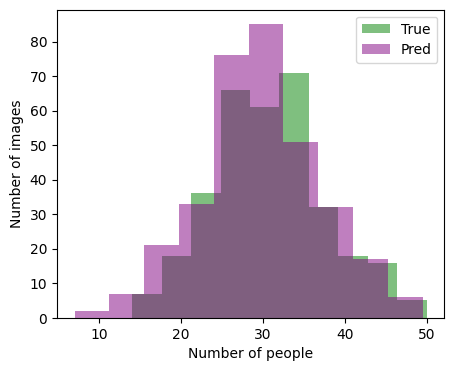

42/42 [==============================] - 64s 2s/step - loss: 25.6240 - mean_absolute_error: 4.0656 - val_loss: 31.1905 - val_mean_absolute_error: 4.3396
Epoch 5/20
11/11 [==============================] - 4s 319ms/step


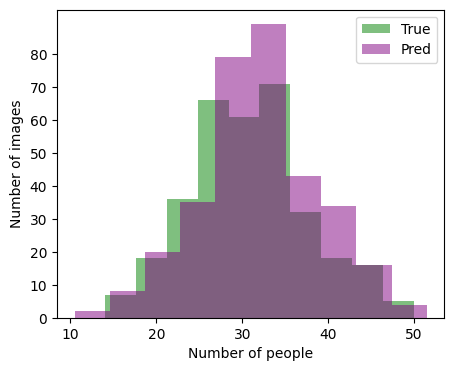

42/42 [==============================] - 65s 2s/step - loss: 20.3575 - mean_absolute_error: 3.5794 - val_loss: 29.4846 - val_mean_absolute_error: 4.2742
Epoch 6/20
11/11 [==============================] - 4s 354ms/step


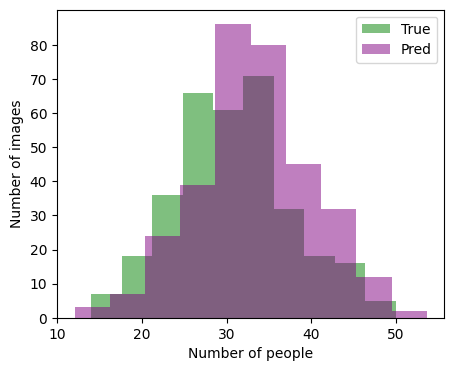

42/42 [==============================] - 64s 2s/step - loss: 15.5914 - mean_absolute_error: 3.1196 - val_loss: 33.5942 - val_mean_absolute_error: 4.6316
Epoch 7/20
11/11 [==============================] - 4s 404ms/step


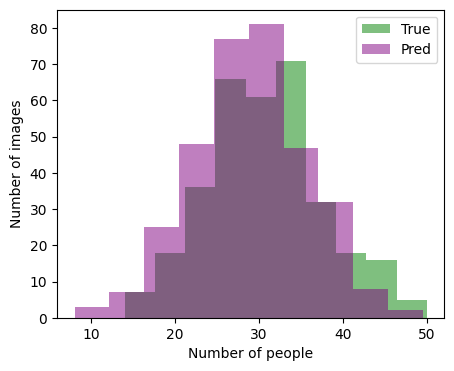

42/42 [==============================] - 63s 2s/step - loss: 18.0393 - mean_absolute_error: 3.3933 - val_loss: 27.1307 - val_mean_absolute_error: 4.0651
Epoch 8/20
11/11 [==============================] - 5s 432ms/step


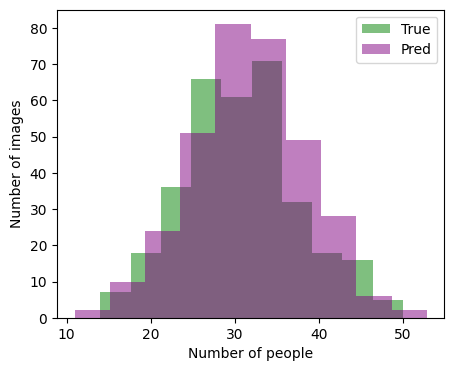

42/42 [==============================] - 65s 2s/step - loss: 13.2913 - mean_absolute_error: 2.9222 - val_loss: 25.3308 - val_mean_absolute_error: 3.8986
Epoch 9/20
11/11 [==============================] - 4s 408ms/step


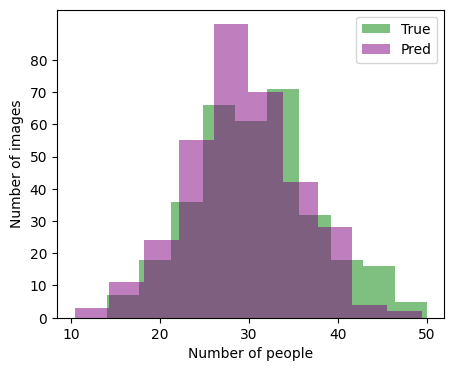

42/42 [==============================] - 68s 2s/step - loss: 10.8751 - mean_absolute_error: 2.6003 - val_loss: 23.7033 - val_mean_absolute_error: 3.6578
Epoch 10/20
11/11 [==============================] - 4s 329ms/step


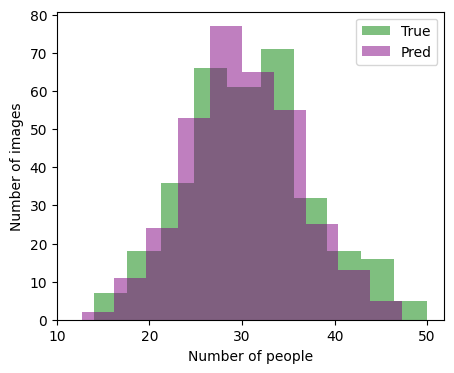

42/42 [==============================] - 65s 2s/step - loss: 12.4874 - mean_absolute_error: 2.8093 - val_loss: 23.6286 - val_mean_absolute_error: 3.6846
Epoch 11/20
11/11 [==============================] - 4s 330ms/step


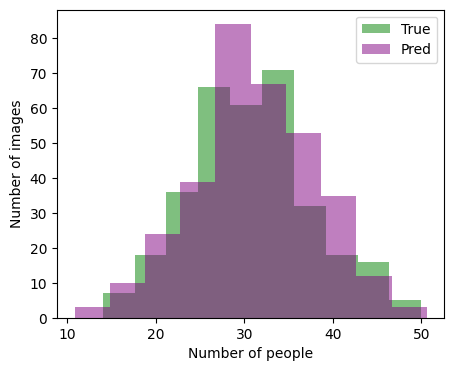

42/42 [==============================] - 65s 2s/step - loss: 12.5152 - mean_absolute_error: 2.7875 - val_loss: 20.8683 - val_mean_absolute_error: 3.5196
Epoch 12/20
11/11 [==============================] - 4s 325ms/step


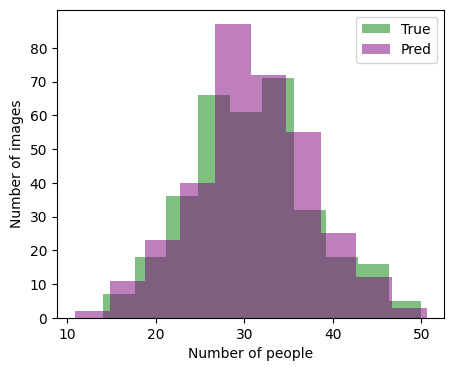

42/42 [==============================] - 66s 2s/step - loss: 8.2117 - mean_absolute_error: 2.2728 - val_loss: 21.4048 - val_mean_absolute_error: 3.5689
Epoch 13/20
11/11 [==============================] - 4s 319ms/step


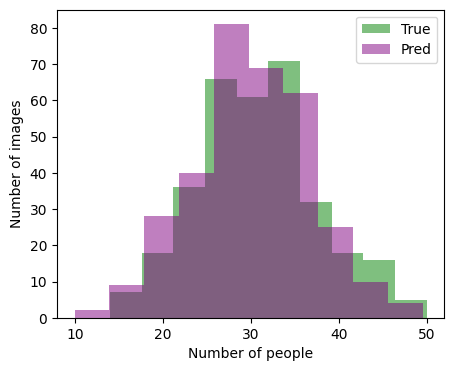

42/42 [==============================] - 64s 2s/step - loss: 6.7307 - mean_absolute_error: 2.0638 - val_loss: 20.8317 - val_mean_absolute_error: 3.4747
Epoch 14/20
11/11 [==============================] - 5s 414ms/step


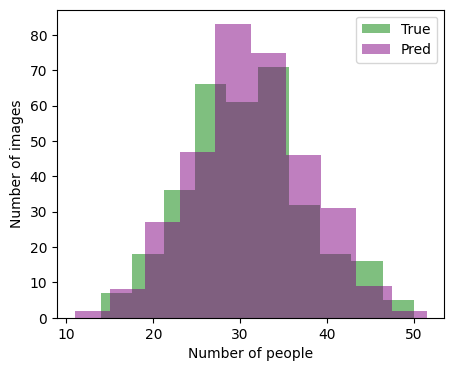

42/42 [==============================] - 64s 2s/step - loss: 6.5887 - mean_absolute_error: 2.0144 - val_loss: 20.1353 - val_mean_absolute_error: 3.4780
Epoch 15/20
11/11 [==============================] - 4s 324ms/step


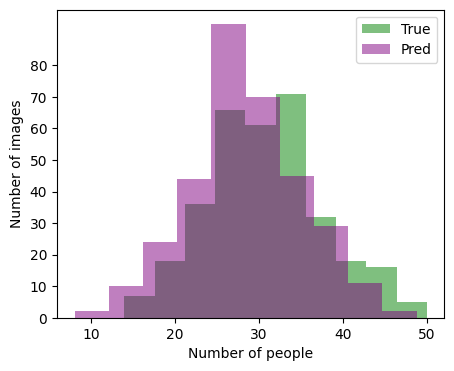

42/42 [==============================] - 64s 2s/step - loss: 10.2490 - mean_absolute_error: 2.5803 - val_loss: 24.7894 - val_mean_absolute_error: 3.8791
Epoch 16/20
11/11 [==============================] - 4s 342ms/step


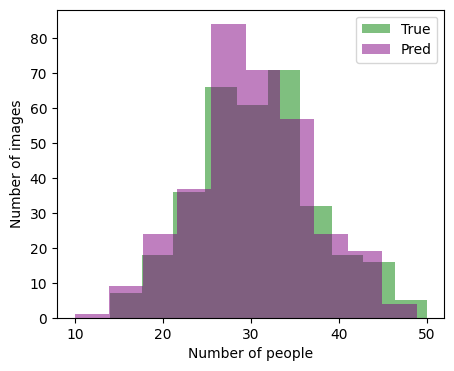

42/42 [==============================] - 67s 2s/step - loss: 7.6273 - mean_absolute_error: 2.2237 - val_loss: 19.4877 - val_mean_absolute_error: 3.3868
Epoch 17/20
11/11 [==============================] - 4s 326ms/step


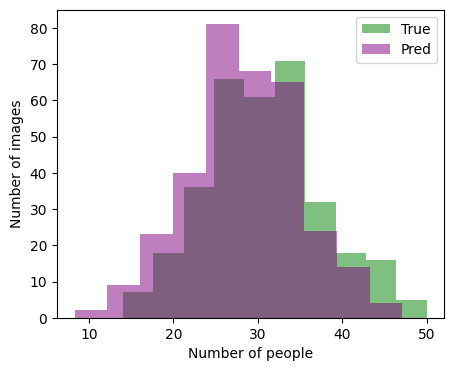

42/42 [==============================] - 67s 2s/step - loss: 10.3401 - mean_absolute_error: 2.6180 - val_loss: 24.2076 - val_mean_absolute_error: 3.7817
Epoch 18/20
11/11 [==============================] - 4s 326ms/step


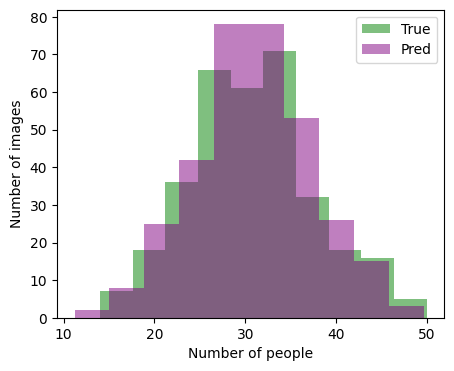

42/42 [==============================] - 69s 2s/step - loss: 7.5450 - mean_absolute_error: 2.1906 - val_loss: 18.2020 - val_mean_absolute_error: 3.3035
Epoch 19/20
11/11 [==============================] - 4s 327ms/step


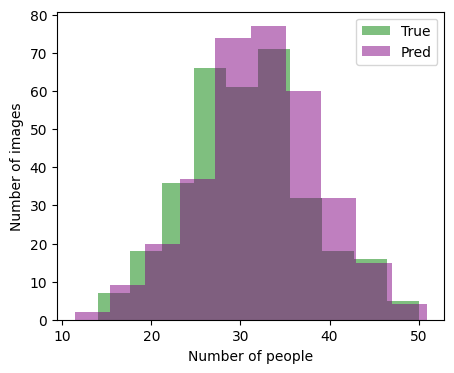

42/42 [==============================] - 65s 2s/step - loss: 4.7599 - mean_absolute_error: 1.7447 - val_loss: 20.2454 - val_mean_absolute_error: 3.6053
Epoch 20/20
11/11 [==============================] - 4s 413ms/step


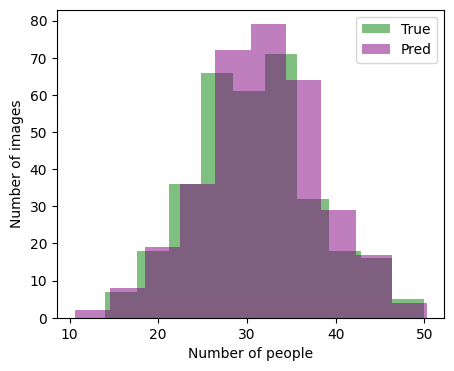

42/42 [==============================] - 65s 2s/step - loss: 4.5549 - mean_absolute_error: 1.7237 - val_loss: 18.8342 - val_mean_absolute_error: 3.4179


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(256, (3, 3), strides=(4, 6), padding="same",input_shape=(480, 640, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), strides=(4, 3), padding="same"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), padding="same"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear'),
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[callback], shuffle=True)


# Results

Выведем значения разницы лоссов на каждой эпохе

<function matplotlib.pyplot.show(close=None, block=None)>

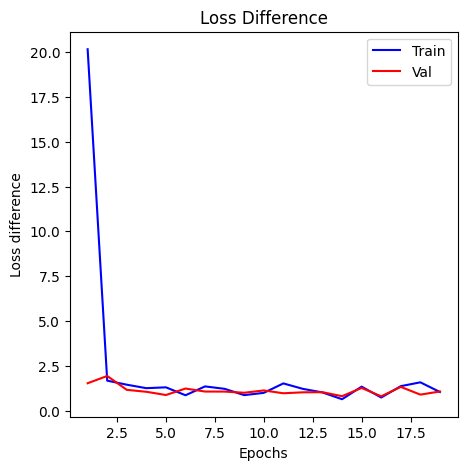

In [ ]:
loss_diff = np.array(callback.diffs)
val_loss_diff = np.array(callback.val_diffs)
plt.figure(figsize=(5, 5))
plt.plot(loss_diff[:, 0], loss_diff[:, 1], label='Train', color='b')
plt.plot(val_loss_diff[:, 0], val_loss_diff[:, 1], label='Val', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss difference')
plt.title('Loss Difference')
plt.legend()
plt.show

In [ ]:
df = pd.DataFrame({'true': y_test.ravel(), 'pred': model.predict(X_test).ravel().astype(int)})
df['diff'] = abs(df['true'] - df['pred'])
print(df['diff'].mean())
df.head(10)

11/11 [==============================] - 4s 317ms/step
2.893939393939394


,true,pred,diff
0,29,26,3
1,28,29,1
2,27,24,3
3,35,36,1
4,35,33,2
5,27,35,8
6,29,28,1
7,36,38,2
8,37,34,3
9,16,16,0


Как можно заметить, значения различаются в среднем на 3 человека

In [ ]:
model.evaluate(X_test, y_test)
None

11/11 [==============================] - 4s 351ms/step - loss: 13.8587 - mean_absolute_error: 2.9512


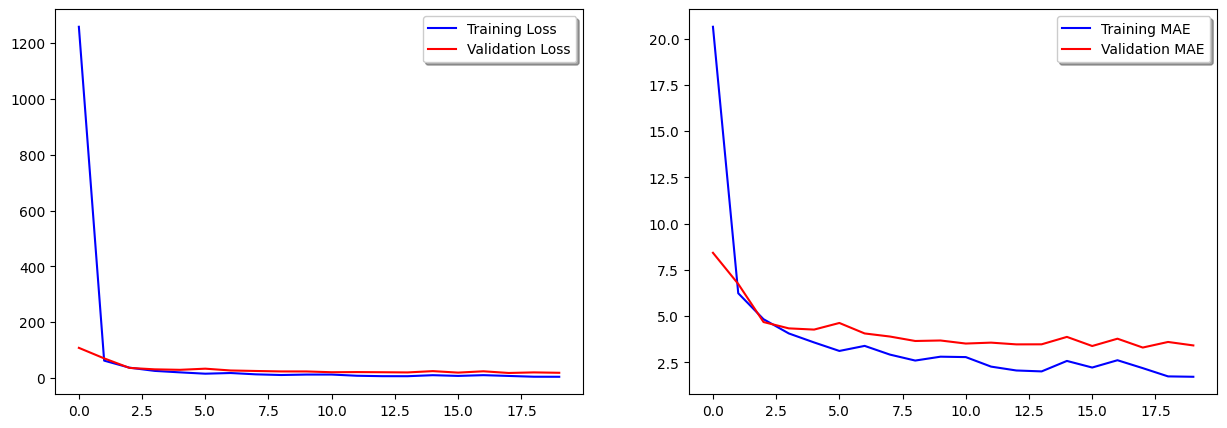

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['mean_absolute_error'], color='b', label="Training MAE")
ax[1].plot(history.history['val_mean_absolute_error'], color='r',label="Validation MAE")
legend = ax[1].legend(loc='best', shadow=True)